# OpenAI Gym Overview: Breakout Game

I created this notebooks by coding along the following Udemy course by J. M. Portilla:

[Practical AI with Python and Reinforcement Learning](https://www.udemy.com/course/practical-ai-with-python-and-reinforcement-learning/learn/)

Have a look at the guide in this folder for more details on the theory and an overview on the contents of this folder:

`ReinforcementLearning_Guide.md`.

This notebook start exploring the OpenAI Gym library with the following game:

[Breakout](https://gym.openai.com/envs/Breakout-ram-v0/)

Note that the RAM version can be used: the ball position and paddle location are obtained from `gym`.

Note: if we use Jupyter notebooks, sometimes we need to restart the kernel; an alternative is to use python scripts.

In [1]:
import gym

/Users/mxagar/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ale_py/roms/utils.py:90: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for external in metadata.entry_points().get(self.group, []):


In [2]:
# For plotting
import matplotlib.pyplot as plt
# For slowing down the game
import time

In [3]:
# Select a game/environment from
# gym.openai.com
# If we go to Atari/Breakout-v0 we can see the source code
# We could use the source code file or let gym grab it
# as follows below

In [4]:
# The string of the name is the title of the game
env_name = 'Breakout-v0'
#env_name = 'Breakout-ram-v0'

In [5]:
# The source code is grabbed
env = gym.make(env_name)

A.L.E: Arcade Learning Environment (version +978d2ce)
[Powered by Stella]


In [9]:
# We can interact/play from some Atari games
# and classic control envs.
# We need to have pygame installed: pip install pygame
from gym.utils import play

In [8]:
# We pass the env and zoom the window 2-3x
# Keys:
# - space: launch ball
# - a: move left
# - d: move right
# When we close the window, we might need to restart the kernel
play.play(env,zoom=3)

In [10]:
# Window will be opened and game rendered step-wise (but very fast)
# Nothing happens for now
# because no actions are commanded
for steps in range(2000):
    env.render(mode='human')

/Users/mxagar/opt/anaconda3/envs/tf/lib/python3.7/site-packages/gym/envs/atari/environment.py:257: UserWarning: WARN: We strongly suggest supplying `render_mode` when constructing your environment, e.g., gym.make(ID, render_mode='human'). Using `render_mode` provides access to proper scaling, audio support, and proper framerates.
  "We strongly suggest supplying `render_mode` when "
2022-01-10 11:25:47.747 python[44471:1870412] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fdb5074f140>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-01-10 11:25:47.747 python[44471:1870412] Warning: Expected min height of view: (<NSButton: 0x7fdb0099db10>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-01-10 11:25:47.749 python[44471:1870412] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7fdb0099ddc0>) to be

In [11]:
# Close env/game window
env.close()

In [12]:
array = env.render(mode='rgb_array')

In [14]:
array.shape

(210, 160, 3)

In [15]:
env.close()

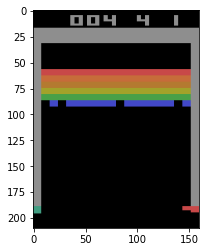

In [18]:
%matplotlib inline
plt.imshow(array)